In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
# Load two images
img1 = cv2.imread('../DATA/dog_backpack.png')
img2 = cv2.imread('../DATA/watermark_no_copy.png')
img2 =cv2.resize(img2,(600,600))

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [5]:
img2.shape

(600, 600, 3)

In [6]:
img1.shape

(1401, 934, 3)

In [58]:
x_start = img1.shape[1] - img2.shape[1]
y_start = img1.shape[0] - img2.shape[0]

In [59]:
roi = img1[y_start:,x_start:]
roi.shape

(600, 600, 3)

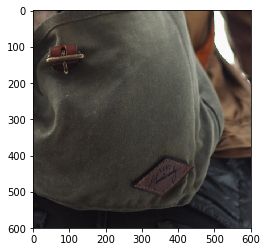

In [9]:
plt.imshow(roi)

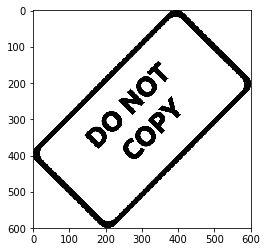

In [60]:
img2gray = cv2.cvtColor(img2,cv2.COLOR_RGB2GRAY)
plt.imshow(img2gray, cmap="gray")

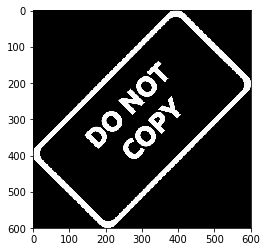

In [61]:
mask_inv = cv2.bitwise_not(img2gray)
plt.imshow(mask_inv, cmap="gray")

In [66]:
bg = np.full(img2.shape,255,dtype=np.uint8)

mask3c = cv2.bitwise_and(bg,bg,mask=mask_inv)
#plt.imshow(mask)
mask3c.shape

(600, 600, 3)

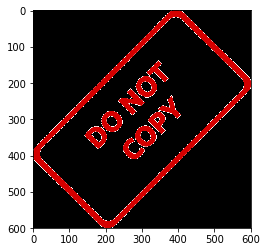

In [62]:
fg = cv2.bitwise_or(img2,img2,mask=mask_inv)
plt.imshow(fg)

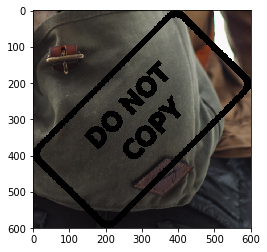

In [68]:
#roi2 = cv2.bitwise_or(roi,fg)
roi2 = cv2.subtract(roi,mask3c)
plt.imshow(roi2)
roi3 = cv2.add(roi2,fg)

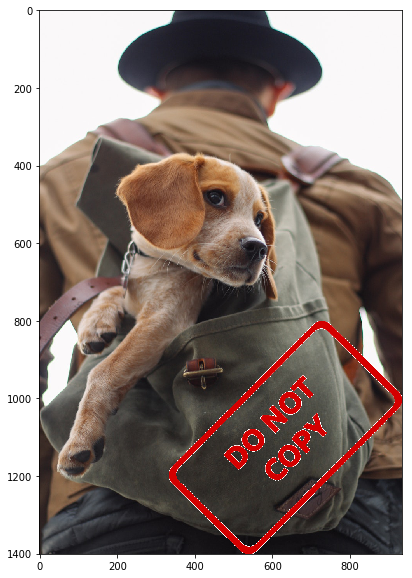

In [72]:
imgg = img1.copy()
imgg[y_start:,x_start:]=roi3

#resize display canvas
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.imshow(imgg)

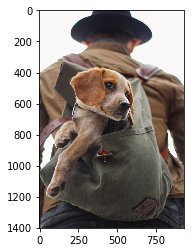

In [73]:
plt.imshow(img1)

In [76]:
def show_pic(km):
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111)
    ax.imshow(km)

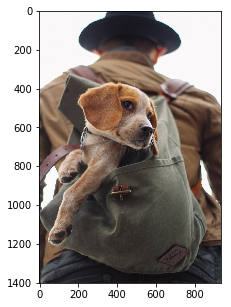

In [77]:
show_pic(img1)

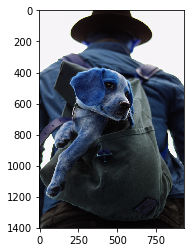

In [93]:
img = cv2.imread('../DATA/dog_backpack.png').astype(np.float32)/255
ing = cv2.imread('../DATA/dog_backpack.jpg')

gama = 1.5

# ing = np.power(ing,gama)
img = np.power(img,gama)
plt.imshow(img)